In [7]:
import sys, os

import matplotlib.pyplot as plt

import torch
from data.mnist import load_mnist
import pickle
import torch.nn.functional as F
import numpy as np

def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True)
    return x_train, y_train

In [8]:
def init_network():
    with open("C:\\Users\\dinle\\Code\\AI\\Learning\\MNIST\\data\\sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    x = torch.from_numpy(x)
    size = len(x)
    W1, W2, W3 = torch.from_numpy(network['W1']), torch.from_numpy(network['W2']), torch.from_numpy(network['W3'])
    b1, b2, b3 = torch.from_numpy(network['b1']), torch.from_numpy(network['b2']), torch.from_numpy(network['b3'])

    a1 = torch.mm(x, W1) + b1

    z1 = F.sigmoid(a1)
    a2 = torch.mm(z1, W2) + b2
    z2 = F.sigmoid(a2)
    a3 = torch.mm(z2, W3) + b3
    y = F.softmax(a3)

    return y

In [9]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
batch_size = 100

In [10]:
for i in range(0, len(x), batch_size):
    x_b = x[i:i+batch_size]
    y_b = predict(network, x_b)
    p = np.argmax(y_b, axis=1).numpy()
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print(str(float(accuracy_cnt)/ len(x)))

C:\Users\dinle\AppData\Local\Temp\ipykernel_27688\719382583.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y = F.softmax(a3)


0.9357666666666666


In [11]:
from funcs.gradient_2d import gradient_descent

i_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 20
x_g, x_his = gradient_descent(lambda x: x[0] ** 2 + x[1] ** 2, i_x, lr=lr, step_num=step_num)

print(x_g, x_his)

[-0.03458765  0.04611686] [[-3.          4.        ]
 [-2.4         3.2       ]
 [-1.92        2.56      ]
 [-1.536       2.048     ]
 [-1.2288      1.6384    ]
 [-0.98304     1.31072   ]
 [-0.786432    1.048576  ]
 [-0.6291456   0.8388608 ]
 [-0.50331648  0.67108864]
 [-0.40265318  0.53687091]
 [-0.32212255  0.42949673]
 [-0.25769804  0.34359738]
 [-0.20615843  0.27487791]
 [-0.16492674  0.21990233]
 [-0.1319414   0.17592186]
 [-0.10555312  0.14073749]
 [-0.08444249  0.11258999]
 [-0.06755399  0.09007199]
 [-0.0540432   0.07205759]
 [-0.04323456  0.05764608]]


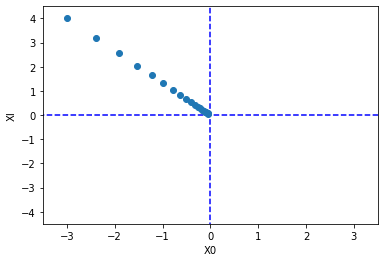

In [12]:
plt.plot ( [-5,5], [0,0], '--b' )
plt.plot( [0,0], [-5,5],'--b')
plt.plot(x_his[:,0], x_his[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel ("X0" )
plt.ylabel ("Xl" )
plt.show ()